In [1]:
import tensorflow as tf
from tensorflow import keras 
from keras.preprocessing.image import ImageDataGenerator
from keras import layers, models, callbacks
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
train_path = r'C:\Users\KIIT\projects\Rock-paper-Scissor\Dataset\train'
test_path = r'C:\Users\KIIT\projects\Rock-paper-Scissor\Dataset\test'

In [3]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(64,64), class_mode='categorical', batch_size=3,shuffle=True)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(64,64), class_mode='categorical', batch_size=3, shuffle=True)

Found 1806 images belonging to 3 classes.
Found 108 images belonging to 3 classes.


In [4]:
classes=['Paper','Rock','Scissor']
imgs, labels = next(train_batches)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


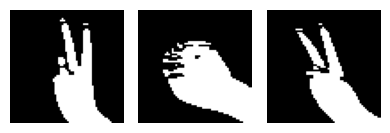



Scissor Rock Scissor 

(3, 64, 64, 3)


In [5]:
def plot_sample(images_arr):
    fig, axes = plt.subplots(1, 3, figsize=(4,2))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show( )
    print("\n")
    for i in labels:
        print(classes[np.argmax(i)],end=" ")

plot_sample(imgs)
print("\n")
print(imgs.shape)


In [6]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(64,64,3)),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu',padding = 'same'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu',padding = 'valid'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    

    #dense
    layers.Flatten(),
    layers.Dense(64,activation ="relu"),
    layers.Dense(128,activation ="relu"),
    layers.Dense(128, activation='relu'),
    # layers.Dropout(0.3),
    layers.Dense(3, activation='softmax')
])

In [7]:
cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0005)
early_stop = callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

In [9]:
history1 = cnn.fit(train_batches, epochs=10, callbacks=[reduce_lr, early_stop],  validation_data = test_batches)

Epoch 1/10
602/602 [==============================] - 10s 14ms/step - loss: 0.1493 - accuracy: 0.9922 - val_loss: 0.9347 - val_accuracy: 0.7130 - lr: 0.0010
Epoch 2/10
602/602 [==============================] - 8s 13ms/step - loss: 9.0165e-08 - accuracy: 1.0000 - val_loss: 1.1661 - val_accuracy: 0.6944 - lr: 0.0010
Epoch 3/10
602/602 [==============================] - 8s 13ms/step - loss: 1.5644e-08 - accuracy: 1.0000 - val_loss: 1.1607 - val_accuracy: 0.6944 - lr: 5.0000e-04


In [10]:
print(history1.history)

{'loss': [0.14927026629447937, 9.016525126526176e-08, 1.5643724537994785e-08], 'accuracy': [0.9922480583190918, 1.0, 1.0], 'val_loss': [0.9347328543663025, 1.1661080121994019, 1.160735011100769], 'val_accuracy': [0.7129629850387573, 0.6944444179534912, 0.6944444179534912], 'lr': [0.001, 0.001, 0.0005]}


In [11]:
cnn.save('best_model_dataflair3.h5')

In [12]:
imgs, labels = next(test_batches)

model = keras.models.load_model(r"best_model_dataflair3.h5")

scores = model.evaluate(imgs, labels, verbose=0)
print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

model.summary()


loss of 1.7028275728225708; accuracy of 66.66666865348816%
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 128)       73856     
                                                               

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predictions on a small set of test data--

Scissor   Scissor   Rock   
Actual images with labels:


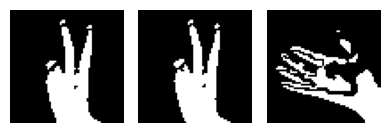



Scissor Scissor Paper 

{'loss': [0.14927026629447937, 9.016525126526176e-08, 1.5643724537994785e-08],
 'accuracy': [0.9922480583190918, 1.0, 1.0],
 'val_loss': [0.9347328543663025, 1.1661080121994019, 1.160735011100769],
 'val_accuracy': [0.7129629850387573, 0.6944444179534912, 0.6944444179534912],
 'lr': [0.001, 0.001, 0.0005]}

In [13]:
predictions = model.predict(imgs, verbose=0)
print("predictions on a small set of test data--")
print("")
for ind, i in enumerate(predictions):
    print(classes[np.argmax(i)], end='   ')

print('\nActual images with labels:')
plot_sample(imgs)

history1.history